Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Model Accuracy: 0.8324


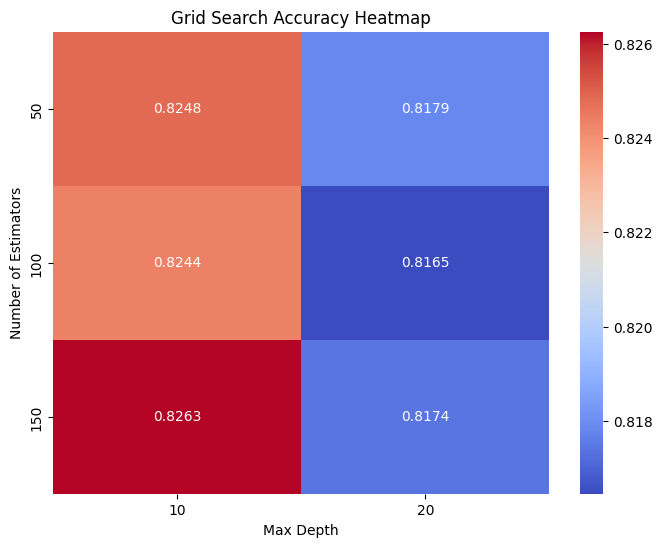

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset from seaborn
df = sns.load_dataset("titanic")

# Select relevant features
features = ["pclass", "sex", "age", "sibsp", "parch", "fare"]
df = df[features + ["survived"]]

# Handle missing values
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

# Encode categorical variables
df["sex"] = LabelEncoder().fit_transform(df["sex"])

# Drop any remaining missing values
df.dropna(inplace=True)

# Split into features and target
X = df.drop(columns=["survived"])
y = df["survived"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the optimized model
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on test set
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Convert results into a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Pivot the table to create a heatmap
pivot_table = cv_results.pivot_table(values="mean_test_score",
                                     index="param_n_estimators",
                                     columns="param_max_depth")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".4f")
plt.xlabel("Max Depth")
plt.ylabel("Number of Estimators")
plt.title("Grid Search Accuracy Heatmap")
plt.show()
